In [3]:
import os
# project_root = os.path.dirname(os.getcwd())
# os.chdir(project_root)

print(os.getcwd())

C:\Users\nrbha\Git-Codes\Spotify


In [4]:
import pandas as pd
import numpy as np
import configparser
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load configuration
config = configparser.ConfigParser()
config_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'config.ini'))
config.read('config.ini')

plt.rcParams["figure.figsize"] = tuple(int(s) for s in (config['settings']['fig_size'].strip("()").split(',')))

albums_df = pd.read_csv(config['files']['album_data'])

In [8]:
albums_df.head()

,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.521
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.041
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.855
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.241
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.060


In [6]:
albums_df.shape

(438973, 26)

In [7]:
albums_df.describe()

,track_number,duration_ms,artists,total_tracks,album_popularity,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec
count,438973.000000,4.389730e+05,0.0,438973.000000,438973.000000,0.0,0.0,0.0,0.0,0.0,438973.000000
mean,8.367467,2.162694e+05,NaN,19.168142,17.512667,NaN,NaN,NaN,NaN,NaN,216.269371
std,8.391625,1.278670e+05,NaN,26.403792,20.620725,NaN,NaN,NaN,NaN,NaN,127.867003
min,1.000000,0.000000e+00,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2.000000,1.607190e+05,NaN,9.000000,1.000000,NaN,NaN,NaN,NaN,NaN,160.719000
50%,6.000000,2.052950e+05,NaN,13.000000,8.000000,NaN,NaN,NaN,NaN,NaN,205.295000
75%,11.000000,2.519330e+05,NaN,21.000000,29.000000,NaN,NaN,NaN,NaN,NaN,251.933000
max,110.000000,1.791900e+07,NaN,984.000000,100.000000,NaN,NaN,NaN,NaN,NaN,17919.000000


In [9]:
# drop columns where more then 95% data is missing (dropping artist_3 through artist_11 and artists)
drop_columns = ['artist_3','artist_4','artist_5','artist_6','artist_7','artist_8','artist_9','artist_10','artist_11','artists']
albums_df.drop(columns=drop_columns,axis=1, inplace=True)

# Renaming the columns
albums_df.rename(columns={'track_name':'Track_Name',
                         'track_id':'Track_ID',
                         'track_number':'Track_Number',
                         'duration_ms':'Track_Duration_ms',
                         'album_type':'Album_Type',
                         'total_tracks':'Total_Tracks',
                         'album_name':'Name',
                         'release_date':'Release_Date',
                         'label':'Label',
                         'album_popularity':'Popularity',
                         'album_id':'ID',
                         'artist_id':'Artist_ID',
                         'artist_0':'Artist_0',
                         'artist_1':'Artist_1',
                         'artist_2':'Artist_2',
                         'duration_sec':'Track_Duration'
                         },inplace=True)

# Dropping the two tracks where the track name is missing, we can use the track id to find the track name using the spotify url.
# but as these are only two I am removing them.

index = albums_df[albums_df['Track_Name'].isna()].index
albums_df.drop(index=index,axis=0,inplace=True)

# Filling up all the missing values with a default min date value for Release date and label
albums_df['Release_Date'].fillna('1900-01-01 00:00:00 UTC', inplace=True)
albums_df['Label'].fillna('Unknown', inplace=True)
albums_df['R_Date']= pd.to_datetime(albums_df['Release_Date'], format='%Y%m%d', infer_datetime_format=True).apply(
    lambda row: dt.strftime(row,'%Y-%m-%d') 
)
albums_df['R_Year']= pd.to_datetime(albums_df['Release_Date'], format='%Y%m%d', infer_datetime_format=True).apply(
    lambda row: dt.strftime(row,'%Y'))

albums_df.isna().sum()

Track_Name                0
Track_ID                  0
Track_Number              0
Track_Duration_ms         0
Album_Type                0
Total_Tracks              0
Name                      0
Release_Date              0
Label                     0
Popularity                0
ID                        0
Artist_ID                 0
Artist_0                  0
Artist_1             338486
Artist_2             395321
Track_Duration            0
R_Date                    0
R_Year                    0
dtype: int64

In [10]:
pd.DataFrame({'Nulls':albums_df.isna().sum(),
             'Uniques':albums_df.nunique(),
             'shape':albums_df.shape[0],
             'diff':albums_df.shape[0]-albums_df.nunique()}).head(20)

,Nulls,Uniques,shape,diff
Track_Name,0,301280,438971,137691
Track_ID,0,438946,438971,25
Track_Number,0,53,438971,438918
Track_Duration_ms,0,148237,438971,290734
Album_Type,0,3,438971,438968
Total_Tracks,0,159,438971,438812
Name,0,63486,438971,375485
Release_Date,0,7731,438971,431240
Label,0,34934,438971,404037
Popularity,0,99,438971,438872


In [11]:
album_type_filtered_df = albums_df.groupby('Album_Type').agg({
    'ID': 'nunique',
    'Artist_ID':'nunique',
    'Track_Duration': 'mean'
})

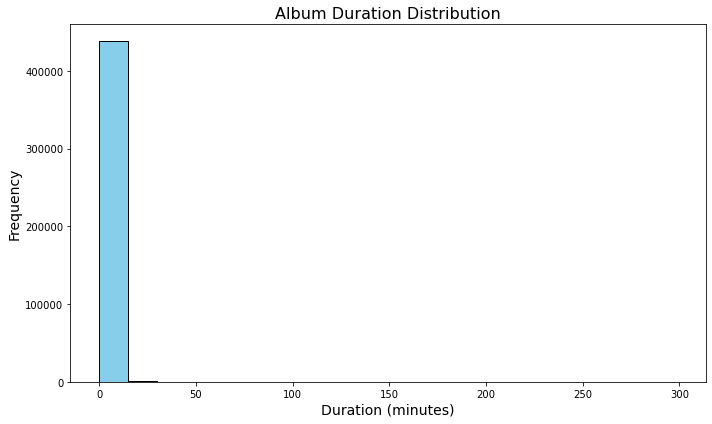

In [12]:

album_durations = albums_df['Track_Duration_ms'] / 1000 / 60  # Convert milliseconds to minutes

fig, ax = plt.subplots(figsize=(10, 6))
# Create histogram
ax.hist(album_durations, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Duration (minutes)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Album Duration Distribution', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

In [14]:
albums_df.head()

,Track_Name,Track_ID,Track_Number,Track_Duration_ms,Album_Type,Total_Tracks,Name,Release_Date,Label,Popularity,ID,Artist_ID,Artist_0,Artist_1,Artist_2,Track_Duration,R_Date,R_Year
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,NaN,NaN,555.521,2015-06-09,2015
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,NaN,NaN,535.041,2015-06-09,2015
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,NaN,NaN,545.855,2015-06-09,2015
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,NaN,NaN,305.241,2015-06-09,2015
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,NaN,NaN,351.060,2015-06-09,2015


In [15]:
# Uncomment to see the original dataframe
original_albums_df = pd.read_csv(config['files']['album_data'])
original_albums_df.head()

,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.521
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.041
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.855
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.241
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.060


In [16]:
albums_df.to_csv(config['directories']['clean_data']+"albums_data.csv", index=False)

In [17]:
del albums_df
del original_albums_df